# Observer/Observable in Python

Here is a quick example of the Observer/Observable pattern in python. We use a simple model object to hold data that is to be rendered by a plot object. As the data in the model is changed, we want to notify the plot without the model knowing any details (i.e. not having a direct dependency) about the plot/graph.

## Start with the Observable

Start with a base class, Observable. Anything that inherits from this class can be "observed". Essentially, this base class will hold a list of observers and manage registering and unregistering observers. Leveraging [Giant Flying Saucer](http://www.giantflyingsaucer.com/blog/?p=5117) example.

In [106]:
class Observable:
    """ Extend this class to be observable. """

    def __init__(self):
        self.observers = []

    def register(self, observer):
        if not observer in self.observers:
            self.observers.append(observer)
 
    def unregister(self, observer):
        if observer in self.observers:
            self.observers.remove(observer)
 
    def unregister_all(self):
        if self.observers:
            del self.observers[:]
 
    def update_observers(self, *args):
        """ Walk through the list of observers and call their update method. """
        for observer in self.observers:
            # Any observer must have this update method, see observer interface below.
            observer.update(*args)


## An observable 'Model'

We are creating a very simple class to hold x and y data. We added a convenience method to provide more control over when we actually update our observers.

In [107]:
class Model(Observable):
    """ A class to hold a 2D matrix of data. """

    def __init__(self,name):
        self.name = name
        self.x = []
        self.y = []
        super(Model,self).__init__()

    def _notify(self):
        """ Ensure the dimensions are of equal length before notifying observers. """
        if len(self.x) == len(self.y):
            self.update_observers(self.__dict__)
        
    def set_x(self,x_vals):
        self.x = x_vals
        self._notify()

    def set_y(self,y_vals):
        self.y = y_vals
        self._notify()
    

## The Observer

The base class for Observer is very simple. In Java, it would be an interface. We are using Python's Abstract Base Class with the abstract method (pretty much equivalent to a Java Interface). To observe an observable, all you need to do is implement the update method!

In [108]:
from abc import ABCMeta, abstractmethod
 
class Observer(object):
    __metaclass__ = ABCMeta
 
    @abstractmethod
    def update(self,*args):
        """ Can take an arbitrary list of arguments. """
        pass


For this example, we just have one observer (can certainly have more than one) that is a plot object.

In [109]:
import matplotlib.pyplot as pyplot

class Plot(Observer):
    
    # Just rotating through colors to help differentiate plots
    colors = ['black','blue','green','red']
    
    def __init__(self):
        self.color = -1
        
    def _color(self):
        """ Just work through set of colors """
        color_indx = len(self.colors)-1
        self.color += 1 if self.color < color_indx else -color_indx
        return self.colors[self.color]
        
    
    def update(self,*args):
        pyplot.plot(args[0]['x'],args[0]['y'],self._color())
        pyplot.show()

So, now we'll use our classes by creating a model instance, registering an observer, and setting the data.

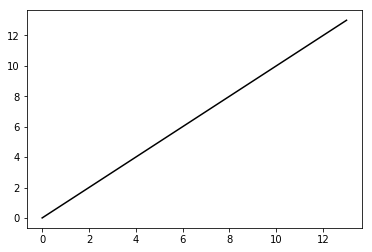

In [110]:
# An Observable instance
m = Model('2D Graph')
# An Observer instance
p = Plot()
# Hook them together
m.register(p)

# Now set the data on observable object, just creating a list from 0 to 13 
m.set_x(range(14))

# Because we ensure the x dimension and y dimension match, the observer isn't notified until y is set.
m.set_y(range(14))


Okay, so, now let's assign y to the first 13 numbers in the fibonacci sequence. Notice, as soon as y is set, the plot is updated. There is no code in this fragment to explicitly re-draw the plot!

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233]


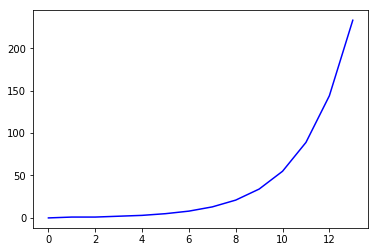

In [111]:
y = [0,1]
for i in range(12):
    y.append(y[i]+y[i+1])
print(y)
    
m.set_y(y)

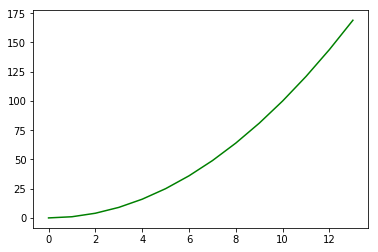

In [112]:
# Change y data to be a quadratic 
m.set_y([x**2 for x in range(14)])

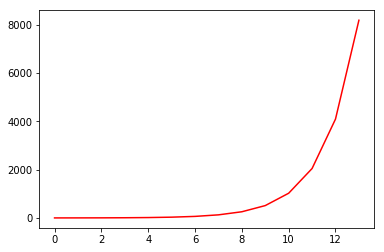

In [113]:
# And for fun, let's go exponential. And our pattern is really paying off now, graphs are redrawn as soon
# as y is set because the observers are notified.
m.set_y([2**x for x in range(14)])

So, we have appropriate coupling and cohesion here. The data doesn't have to know any details about plotting. Models and users of models don't need to depend on graphing details. And the plots need only observe anything that has 2D data to provide a simple graph. They don't need to directly depend on how a model is built or the data calculated, they simply respond to updates to update their view of that data.